In [ ]:
from vllm import LLM, SamplingParams


# Initialize the model
llm = LLM(
    model="meta-llama/Llama-2-7b-hf",
    max_model_len=10200,
    gpu_memory_utilization=1.0
)

INFO 05-14 10:54:54 [config.py:717] This model supports multiple tasks: {'classify', 'score', 'reward', 'generate', 'embed'}. Defaulting to 'generate'.
INFO 05-14 10:54:54 [config.py:2003] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 05-14 10:54:56 [core.py:58] Initializing a V1 LLM engine (v0.8.5.post1) with config: model='deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B', speculative_config=None, tokenizer='deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.bfloat16, max_seq_len=2048, download_dir=None, load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto,  device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='auto', reasoning_backend=None), observability_config=ObservabilityConfig(show_

Loading safetensors checkpoint shards:   0% Completed | 0/1 [00:00<?, ?it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.22it/s]
Loading safetensors checkpoint shards: 100% Completed | 1/1 [00:00<00:00,  1.22it/s]



INFO 05-14 10:54:59 [loader.py:458] Loading weights took 0.91 seconds
INFO 05-14 10:54:59 [gpu_model_runner.py:1347] Model loading took 3.3461 GiB and 1.863290 seconds
INFO 05-14 10:55:09 [backends.py:420] Using cache directory: /home/ghms28/.cache/vllm/torch_compile_cache/8ac38819be/rank_0_0 for vLLM's torch.compile
INFO 05-14 10:55:09 [backends.py:430] Dynamo bytecode transform time: 9.45 s
INFO 05-14 10:55:15 [backends.py:118] Directly load the compiled graph(s) for shape None from the cache, took 5.773 s
INFO 05-14 10:55:17 [monitor.py:33] torch.compile takes 9.45 s in total
INFO 05-14 10:55:19 [kv_cache_utils.py:634] GPU KV cache size: 75,504 tokens
INFO 05-14 10:55:19 [kv_cache_utils.py:637] Maximum concurrency for 2,048 tokens per request: 36.87x
INFO 05-14 10:55:45 [gpu_model_runner.py:1686] Graph capturing finished in 26 secs, took 0.43 GiB
INFO 05-14 10:55:45 [core.py:159] init engine (profile, create kv cache, warmup model) took 45.64 seconds
INFO 05-14 10:55:45 [core_client

In [144]:
# Define sampling parameters
sampling_params = SamplingParams(temperature=0.7, top_p=0.95, max_tokens=256)

# Example prompt
prompts = [
    "Where is LUISS University located?",
    "What country is the city Isfahan in?",
]

# Generate completions
outputs = llm.generate(prompts, sampling_params)

# Process and print the results
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt}")
    print(f"Generated text: {generated_text}")
    print("-" * 50)


Processed prompts: 100%|██████████| 2/2 [00:07<00:00,  3.59s/it, est. speed input: 2.79 toks/s, output: 44.29 toks/s]

Prompt: Where is LUISS University located?
Generated text:  Where is LUISS university located? Is it in Rome, Italy, or another city? I know that LUISS University is a university in Italy but I need to confirm the exact location. Maybe I can find some information online.
</think>

LUISS University is located in Rome, Italy.
--------------------------------------------------
Prompt: What country is the city Isfahan in?
Generated text:  What country is the city...
Wait, maybe I need to rephrase my question to something more specific.

I want to know what countries are in contact with Isfahan, meaning the countries that have Isfahan as a part of their territory.

Also, I need to find out the capital city of Isfahan.

Additionally, I want to know the population of Isfahan.

Lastly, I want to know the distance from Isfahan to the nearest city.

I think I can do some research on this, but I need to organize my thoughts.

First, I need to identify the country that contains Isfahan in its terr

In [25]:
import pandas as pd
import numpy as np
from vllm import LLM, SamplingParams
import json
from datetime import datetime, timedelta
import re

raw_df = pd.read_excel("./data/FullDayWithAlarms.xlsx", header=1)
raw_df
# Rename columns for clarity
raw_df.rename(
    columns={
        "COD \nGIOCO": "Code_ID",
        "DATA ORA": "Timestamp",
        "INTERVALLO\nACQUISIZIONE": "Interval_s",
        "NUMERO\nTRANSAZIONI": "Num_Transactions",
        "TEMPO MIN": "Time_Min",
        "TEMPO MAX": "Time_Max",
        "TEMPO MEDIO": "Mean_Time",
        "NUMERO RETRY": "Num_Retries",
        "NUMERO \nTRANSAZIONI ERRATE": "Num_Wrong_Transactions",
    },
    inplace=True,
)

# # Parse and sort timestamps
raw_df["Timestamp"] = pd.to_datetime(
    raw_df["Timestamp"], dayfirst=True, errors="coerce"
)
raw_df.sort_values("Timestamp", inplace=True)
raw_df.reset_index(drop=True, inplace=True)

df = raw_df

In [ ]:
import pandas as pd
import numpy as np
import json
from datetime import datetime, timedelta
import re
from scipy import stats as scipy_stats
import matplotlib.pyplot as plt
import io
import base64
from statsmodels.tsa.seasonal import seasonal_decompose

# Configuration for variations - set these to True/False to enable/disable
VARIATION_CONFIG = {
    "increased_noise": True,        # #1: Increase noise levels
    "add_outliers": False,           # #3: Add occasional outliers
    "vary_distributions": True,     # #4: Vary sampling distributions
    "add_time_trends": False,        # #5: Add time-based trends
    "vary_sequences": True,         # #6: Use different sequence patterns
    "modify_correlations": True     # #7: Modify correlation structure
}
increased_noise_VARIATION = 0.10  # Increase noise levels by this factor
increased_noise_Factor = 1.08  # Increase noise levels by this factor

outlier_col = np.random.choice(['Num_Transactions', 'Time_Max'])
outlier_factor = np.random.choice([1.07,1.06, 1.05, 1.02, 1, 0.97, 0.96, 0.95, 0.93])  # Either much higher or lower
# Define sampling parameters
sampling_params = SamplingParams(
    temperature=0.05,  # Even lower temperature for more consistent outputs
    top_p=0.85,
    max_tokens=4096  # Increased for more detailed responses
)

# Helper function to convert NumPy types to native Python types
def convert_to_serializable(obj):
    if isinstance(obj, (np.integer, np.int64)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64)):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, pd.Series):
        return convert_to_serializable(obj.to_dict())
    elif isinstance(obj, pd.Timestamp):
        return obj.strftime('%Y-%m-%d %H:%M:%S')
    elif isinstance(obj, dict):
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(i) for i in obj]
    else:
        return obj

# Function to create visualizations of patterns
def create_pattern_visualizations(df):
    # Convert timestamp to datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(7, 2, figsize=(20, 24))
    
    # List of columns to analyze
    columns = ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']
    
    # Create time series plots and histograms
    for i, col in enumerate(columns):
        # Time series plot
        axes[i, 0].plot(df['Timestamp'], df[col])
        axes[i, 0].set_title(f'{col} Time Series')
        axes[i, 0].set_xlabel('Time')
        axes[i, 0].set_ylabel(col)
        axes[i, 0].tick_params(axis='x', rotation=45)
        
        # Histogram
        axes[i, 1].hist(df[col], bins=30)
        axes[i, 1].set_title(f'{col} Distribution')
        axes[i, 1].set_xlabel(col)
        axes[i, 1].set_ylabel('Frequency')
    
    plt.tight_layout()
    
    # Save the figure to a bytes buffer
    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    
    # Convert the image to base64 string
    img_str = base64.b64encode(buf.read()).decode('utf-8')
    plt.close(fig)
    
    return img_str

# Comprehensive analysis of your existing data
def analyze_data(df):
    # Make a copy to avoid modifying the original dataframe
    df_copy = df.copy()
    
    # Convert Timestamp column to datetime if it's not already
    df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
    
    # Sort by timestamp
    df_copy = df_copy.sort_values('Timestamp')
    
    # Basic statistics
    stats = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        stats[col] = {
            'min': float(df_copy[col].min()),
            'max': float(df_copy[col].max()),
            'mean': float(df_copy[col].mean()),
            'median': float(df_copy[col].median()),
            'std': float(df_copy[col].std()),
            'q1': float(df_copy[col].quantile(0.25)),
            'q3': float(df_copy[col].quantile(0.75)),
            'skew': float(scipy_stats.skew(df_copy[col])),
            'kurtosis': float(scipy_stats.kurtosis(df_copy[col]))
        }
    
    # Correlations between columns
    corr_matrix = df_copy.drop(columns=['Timestamp']).corr().to_dict()
    
    # Time-based patterns
    time_patterns = {
        'hour_distribution': {str(k): int(v) for k, v in df_copy.groupby(df_copy['Timestamp'].dt.hour).size().to_dict().items()},
        'day_of_week_distribution': {str(k): int(v) for k, v in df_copy.groupby(df_copy['Timestamp'].dt.dayofweek).size().to_dict().items()}
    }
    
    # Hourly statistics for each column
    hourly_stats = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        hourly_stats[col] = {}
        for hour, group in df_copy.groupby(df_copy['Timestamp'].dt.hour):
            hourly_stats[col][str(hour)] = {
                'mean': float(group[col].mean()),
                'std': float(group[col].std()),
                'min': float(group[col].min()),
                'max': float(group[col].max())
            }
    
    # Calculate moving averages to capture trends
    window_size = min(24, len(df_copy) // 10)  # Use a reasonable window size
    moving_avgs = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        moving_avgs[col] = list(df_copy[col].rolling(window=window_size, min_periods=1).mean().values)
    
    # Extract sequential patterns
    sequence_patterns = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        # Calculate differences between consecutive values
        diffs = df_copy[col].diff().dropna().values
        sequence_patterns[col] = {
            'mean_diff': float(np.mean(diffs)),
            'std_diff': float(np.std(diffs)),
            'max_diff': float(np.max(np.abs(diffs))),
            'autocorrelation': list(pd.Series(df_copy[col]).autocorr(lag=i) for i in range(1, 6))
        }
    
    # Identify cyclic patterns using Fourier analysis
    cyclic_patterns = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        try:
            # Resample to regular intervals if timestamps are irregular
            resampled = df_copy.set_index('Timestamp')[col].resample('5T').mean().interpolate()
            
            # Perform seasonal decomposition
            if len(resampled) >= 24:  # Need enough data points
                result = seasonal_decompose(resampled, model='additive', period=24)
                cyclic_patterns[col] = {
                    'has_seasonality': True,
                    'seasonal_strength': float(result.seasonal.std() / resampled.std()),
                    'trend_strength': float(result.trend.std() / resampled.std())
                }
            else:
                cyclic_patterns[col] = {'has_seasonality': False}
        except:
            cyclic_patterns[col] = {'has_seasonality': False}
    
    # Identify value ranges and common values
    value_patterns = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        if col in ['Num_Transactions', 'Num_Retries', 'Num_Wrong_Transactions']:
            # For integer columns, find common values
            value_counts = df_copy[col].value_counts().head(5).to_dict()
            value_patterns[col] = {
                'common_values': {str(k): int(v) for k, v in value_counts.items()},
                'is_integer': True
            }
        else:
            # For float columns, find common ranges
            value_patterns[col] = {
                'is_integer': False,
                'common_ranges': [
                    {
                        'min': float(df_copy[col].quantile(i/10)),
                        'max': float(df_copy[col].quantile((i+1)/10)),
                        'frequency': int(((df_copy[col] >= df_copy[col].quantile(i/10)) & 
                                         (df_copy[col] < df_copy[col].quantile((i+1)/10))).sum())
                    }
                    for i in range(10)
                ]
            }
    
    # Identify relationships between variables
    relationship_patterns = {}
    for col1 in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        relationship_patterns[col1] = {}
        for col2 in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                    'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
            if col1 != col2:
                # Calculate correlation
                corr = df_copy[col1].corr(df_copy[col2])
                
                # Check if there's a strong relationship
                if abs(corr) > 0.5:
                    # Try to fit a simple linear model
                    slope, intercept, r_value, p_value, std_err = scipy_stats.linregress(df_copy[col1], df_copy[col2])
                    relationship_patterns[col1][col2] = {
                        'correlation': float(corr),
                        'relationship_type': 'linear',
                        'slope': float(slope),
                        'intercept': float(intercept),
                        'r_squared': float(r_value**2)
                    }
                else:
                    relationship_patterns[col1][col2] = {
                        'correlation': float(corr),
                        'relationship_type': 'weak'
                    }
    
    # Create textual descriptions of patterns
    pattern_descriptions = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        # Basic distribution
        if stats[col]['skew'] > 0.5:
            distribution = "right-skewed (positively skewed)"
        elif stats[col]['skew'] < -0.5:
            distribution = "left-skewed (negatively skewed)"
        else:
            distribution = "approximately symmetric"
        
        # Kurtosis
        if stats[col]['kurtosis'] > 0.5:
            kurtosis = "heavy-tailed (more outliers than normal)"
        elif stats[col]['kurtosis'] < -0.5:
            kurtosis = "light-tailed (fewer outliers than normal)"
        else:
            kurtosis = "approximately normal-tailed"
        
        # Time patterns
        time_pattern = "no clear time pattern"
        max_hour = max(hourly_stats[col], key=lambda h: hourly_stats[col][h]['mean'])
        min_hour = min(hourly_stats[col], key=lambda h: hourly_stats[col][h]['mean'])
        if hourly_stats[col][max_hour]['mean'] > hourly_stats[col][min_hour]['mean'] * 1.5:
            time_pattern = f"tends to be higher around hour {max_hour} and lower around hour {min_hour}"
        
        # Sequence patterns
        sequence_pattern = "stable between consecutive records"
        if abs(sequence_patterns[col]['mean_diff']) > 0.1 * stats[col]['mean']:
            direction = "increasing" if sequence_patterns[col]['mean_diff'] > 0 else "decreasing"
            sequence_pattern = f"tends to be {direction} over time"
        elif sequence_patterns[col]['std_diff'] > 0.2 * stats[col]['std']:
            sequence_pattern = "fluctuates significantly between consecutive records"
        
        # Combine descriptions
        pattern_descriptions[col] = f"""
        {col} has a {distribution}, {kurtosis} distribution with values typically between {stats[col]['q1']:.2f} and {stats[col]['q3']:.2f}.
        It {time_pattern} and {sequence_pattern}.
        The average value is {stats[col]['mean']:.2f} with a standard deviation of {stats[col]['std']:.2f}.
        """
    
    return {
        'basic_stats': stats,
        'correlations': corr_matrix,
        'time_patterns': time_patterns,
        'hourly_stats': hourly_stats,
        'moving_avgs': moving_avgs,
        'sequence_patterns': sequence_patterns,
        'cyclic_patterns': cyclic_patterns,
        'value_patterns': value_patterns,
        'relationship_patterns': relationship_patterns,
        'pattern_descriptions': pattern_descriptions
    }

# Perform the analysis
analysis = analyze_data(df)

# Sample a few rows to show the model, but remove the Timestamp column
df_sample = df.sample(min(30, len(df))).copy()
# Convert to datetime first to ensure proper handling
df_sample['Timestamp'] = pd.to_datetime(df_sample['Timestamp'])
# Now drop the Timestamp column for the sample
df_sample = df_sample.drop(columns=['Timestamp'])
sample_rows = df_sample.to_dict('records')
# Convert sample rows to serializable format
sample_rows = convert_to_serializable(sample_rows)

# Create a prompt for the model with detailed pattern descriptions
def create_prompt(analysis, sample_rows, num_records=1018):
    prompt = f"""
You are a data generation expert with deep expertise in statistical patterns and time series analysis. I need you to generate synthetic transaction data that PRECISELY follows the patterns in my existing dataset.

Here are detailed pattern descriptions for each column:

{json.dumps(analysis['pattern_descriptions'], indent=2)}

Here are the basic statistics of my existing data:
{json.dumps(analysis['basic_stats'], indent=2)}

Here are the correlations between columns:
{json.dumps(analysis['correlations'], indent=2)}

Here are the value patterns (common values and ranges):
{json.dumps(analysis['value_patterns'], indent=2)}

Here are the relationships between variables:
{json.dumps(analysis['relationship_patterns'], indent=2)}

Here are some sample rows from my existing data (without timestamps):
{json.dumps(sample_rows, indent=2)}

Please generate {num_records} records with these columns:
'Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions'

CRITICAL REQUIREMENTS:
1. The data must follow the EXACT same statistical distributions as the original data
2. Maintain the correlations between columns (e.g., if Time_Min and Time_Max are correlated in the original data, they should be in your generated data)
3. Ensure Time_Max > Time_Min and Mean_Time is between Time_Min and Time_Max
4. Keep the fluctuations between consecutive records similar to the original data
5. Values should stay within the min/max ranges of the original data
6. For integer columns (Num_Transactions, Num_Retries, Num_Wrong_Transactions), use only integer values
7. For float columns, round to 2 decimal places
8. Return ONLY a valid JSON array of objects with no explanations

The data quality is extremely important - it must be indistinguishable from the original data in terms of patterns and distributions.
"""
    return prompt

# Function to generate synthetic data using statistical models
def generate_synthetic_data(target_date, num_records=1018, trend_factor=1.0):
    synthetic_data = []
    base_date = datetime.strptime(target_date, '%Y-%m-%d')
    
    # Get hourly distribution from original data
    hour_dist = analysis['time_patterns']['hour_distribution']
    hour_weights = np.array([int(hour_dist.get(str(h), 1)) for h in range(24)])
    hour_weights = hour_weights / hour_weights.sum()
    
    # Generate hours based on the original distribution
    hours = np.random.choice(24, size=num_records, p=hour_weights)
    # Sort hours to maintain chronological order
    hours.sort()
    
    # Get basic stats for reference
    stats = analysis['basic_stats']
    seq_patterns = analysis['sequence_patterns']
    hourly_stats = analysis['hourly_stats']
    value_patterns = analysis['value_patterns']
    relationship_patterns = analysis['relationship_patterns']
    
    # Create a copy of the original data for sampling
    df_copy = df.copy()
    df_copy['Timestamp'] = pd.to_datetime(df_copy['Timestamp'])
    df_copy = df_copy.sort_values('Timestamp')
    
    # Extract sequences from original data to maintain patterns
    sequence_length = min(24, len(df_copy) // 10)
    sequences = []
    for i in range(0, len(df_copy) - sequence_length, sequence_length // 2):  # Overlapping sequences
        seq = df_copy.iloc[i:i+sequence_length].copy()
        sequences.append(seq)
    
    # Generate data by sampling and modifying sequences
    remaining = num_records
    result_data = []
    
    while remaining > 0:
        # Randomly select a sequence
        if sequences:
            seq = sequences[np.random.randint(0, len(sequences))].copy()
            # Adjust length if needed
            if len(seq) > remaining:
                seq = seq.iloc[:remaining]
            
            # VARIATION #6: Vary sequence patterns
            if VARIATION_CONFIG["vary_sequences"] and np.random.random() < 0.2:  # 20% of the time
                if np.random.random() < 0.5:
                    # Reverse the sequence
                    seq = seq.iloc[::-1].reset_index(drop=True)
                else:
                    # Shuffle the sequence (but maintain internal correlations)
                    idx = np.random.permutation(len(seq))
                    seq = seq.iloc[idx].reset_index(drop=True)
            
            # Modify the sequence to avoid exact duplication
            for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                        'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
                # VARIATION #1: Increased noise levels
                noise_level = stats[col]['std'] * (increased_noise_VARIATION if VARIATION_CONFIG["increased_noise"] else 0.1)
                
                if col in ['Num_Transactions', 'Num_Retries', 'Num_Wrong_Transactions']:
                    # For integer columns
                    noise = np.random.randint(-1, 2, size=len(seq))  # -1, 0, or 1
                    seq[col] = np.clip(seq[col] + noise, stats[col]['min'], stats[col]['max']).astype(int)
                else:
                    # For float columns
                    noise = np.random.normal(0, noise_level, size=len(seq))
                    seq[col] = np.clip(seq[col] + noise, stats[col]['min'], stats[col]['max']).round(2)
                
                # VARIATION #5: Add time-based trends
                if VARIATION_CONFIG["add_time_trends"]:
                    # Apply trend factor
                    seq[col] = seq[col] * trend_factor
            
            # VARIATION #3: Add occasional outliers
            if VARIATION_CONFIG["add_outliers"]:
                for i in range(len(seq)):
                    if np.random.random() < 0.01:  # 1% chance of outlier
                        seq.loc[seq.index[i], outlier_col] = seq.loc[seq.index[i], outlier_col] * outlier_factor
                        
                        # Ensure constraints are still met
                        if outlier_col == 'Time_Max':
                            seq.loc[seq.index[i], 'Time_Max'] = max(
                                seq.loc[seq.index[i], 'Time_Max'], 
                                seq.loc[seq.index[i], 'Time_Min'] * 1.05
                            )
                            seq.loc[seq.index[i], 'Mean_Time'] = (
                                seq.loc[seq.index[i], 'Time_Min'] + seq.loc[seq.index[i], 'Time_Max']
                            ) / 2
            
            # VARIATION #7: Modify correlation structure
            if VARIATION_CONFIG["modify_correlations"]:
                for i in range(len(seq)):
                    if np.random.random() < 0.3:  # 30% of the time
                        # Find two correlated columns
                        corr_cols = ['Time_Min', 'Time_Max']
                        # Get current values
                        val1, val2 = seq.loc[seq.index[i], corr_cols[0]], seq.loc[seq.index[i], corr_cols[1]]
                        # Add independent noise to slightly decorrelate
                        seq.loc[seq.index[i], corr_cols[0]] = val1 * (1 + np.random.normal(0, 0.05))
                        seq.loc[seq.index[i], corr_cols[1]] = val2 * (1 + np.random.normal(0, 0.05))
                        # Ensure constraints
                        if corr_cols == ['Time_Min', 'Time_Max'] and seq.loc[seq.index[i], 'Time_Max'] <= seq.loc[seq.index[i], 'Time_Min']:
                            seq.loc[seq.index[i], 'Time_Max'] = seq.loc[seq.index[i], 'Time_Min'] * 1.1
            
            # Ensure constraints
            seq['Time_Max'] = np.maximum(seq['Time_Min'] * 1.05, seq['Time_Max'])
            seq['Mean_Time'] = (seq['Time_Min'] + seq['Time_Max']) / 2
            
            # Add to result
            result_data.append(seq)
            remaining -= len(seq)
        else:
            # If no sequences available, generate individual records
            for i in range(remaining):
                hour = hours[num_records - remaining + i]
                minute = np.random.randint(0, 60)
                second = np.random.randint(0, 60)
                timestamp = base_date.replace(hour=int(hour), minute=minute, second=second)
                
                # Generate values based on hourly stats
                hour_key = str(int(hour))
                record = {}
                
                # First generate primary variables
                for col in ['Interval_s', 'Num_Transactions']:
                    hour_mean = hourly_stats.get(col, {}).get(hour_key, {}).get('mean', stats[col]['mean'])
                    hour_std = hourly_stats.get(col, {}).get(hour_key, {}).get('std', stats[col]['std'])
                    
                    # VARIATION #4: Vary sampling distributions
                    if VARIATION_CONFIG["vary_distributions"] and np.random.random() < 0.1:  # 10% of the time
                        # Use a slightly skewed distribution instead of normal
                        skew = np.random.choice([-0.15, 0.15])  # Negative or positive skew
                        value = scipy_stats.skewnorm.rvs(skew, loc=hour_mean, scale=hour_std)
                    else:
                        value = np.random.normal(hour_mean, hour_std)
                    
                    # VARIATION #5: Apply trend factor
                    if VARIATION_CONFIG["add_time_trends"]:
                        value = value * trend_factor
                    
                    if col in ['Num_Transactions', 'Num_Retries', 'Num_Wrong_Transactions']:
                        # For integer columns, sample from common values if available
                        if value_patterns[col]['common_values']:
                            values, counts = zip(*[(int(k), v) for k, v in value_patterns[col]['common_values'].items()])
                            probs = np.array(counts) / sum(counts)
                            value = np.random.choice(values, p=probs)
                        else:
                            value = int(value)
                        record[col] = max(int(stats[col]['min']), min(int(stats[col]['max']), value))
                    else:
                        record[col] = round(max(stats[col]['min'], min(stats[col]['max'], value)), 2)
                
                # Then generate dependent variables using relationships
                for col in ['Time_Min', 'Time_Max', 'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
                    if col not in record:  # Skip if already generated
                        # Find the strongest relationship
                        strongest_rel = None
                        strongest_col = None
                        strongest_r2 = 0
                        
                        for other_col in record.keys():
                            if other_col in relationship_patterns and col in relationship_patterns[other_col]:
                                rel = relationship_patterns[other_col][col]
                                if rel['relationship_type'] == 'linear' and rel['r_squared'] > strongest_r2:
                                    strongest_rel = rel
                                    strongest_col = other_col
                                    strongest_r2 = rel['r_squared']
                        
                        if strongest_rel and strongest_r2 > 0.3:  # Use relationship if strong enough
                            # Generate value based on relationship
                            base_value = record[strongest_col]
                            predicted = strongest_rel['slope'] * base_value + strongest_rel['intercept']
                            
                            # Add some noise
                            noise_level = stats[col]['std'] * (1 - strongest_r2)  # Less noise for stronger relationships
                            
                            # VARIATION #1: Increased noise levels
                            if VARIATION_CONFIG["increased_noise"]:
                                noise_level *= increased_noise_Factor
                                
                            noise = np.random.normal(0, noise_level)
                            value = predicted + noise
                        else:
                            # Generate independently
                            hour_mean = hourly_stats.get(col, {}).get(hour_key, {}).get('mean', stats[col]['mean'])
                            hour_std = hourly_stats.get(col, {}).get(hour_key, {}).get('std', stats[col]['std'])
                            
                            # VARIATION #4: Vary sampling distributions
                            if VARIATION_CONFIG["vary_distributions"] and np.random.random() < 0.1:
                                skew = np.random.choice([-0.15, 0.15])
                                value = scipy_stats.skewnorm.rvs(skew, loc=hour_mean, scale=hour_std)
                            else:
                                value = np.random.normal(hour_mean, hour_std)
                        
                        # VARIATION #5: Apply trend factor
                        if VARIATION_CONFIG["add_time_trends"]:
                            value = value * trend_factor
                        
                        if col in ['Num_Retries', 'Num_Wrong_Transactions']:
                            record[col] = max(int(stats[col]['min']), min(int(stats[col]['max']), int(value)))
                        else:
                            record[col] = round(max(stats[col]['min'], min(stats[col]['max'], value)), 2)
                
                # VARIATION #3: Add occasional outliers
                if VARIATION_CONFIG["add_outliers"] and np.random.random() < 0.01:  # 1% chance
                    record[outlier_col] = record[outlier_col] * outlier_factor
                    # Ensure constraints are still met
                    if outlier_col == 'Time_Max':
                        record['Time_Max'] = max(record['Time_Max'], record['Time_Min'] * 1.05)
                        record['Mean_Time'] = (record['Time_Min'] + record['Time_Max']) / 2
                
                # VARIATION #7: Modify correlation structure
                if VARIATION_CONFIG["modify_correlations"] and np.random.random() < 0.3:  # 30% of the time
                    # Find two correlated columns
                    corr_cols = ['Time_Min', 'Time_Max']
                    # Get current values
                    val1, val2 = record[corr_cols[0]], record[corr_cols[1]]
                    # Add independent noise to slightly decorrelate
                    record[corr_cols[0]] = val1 * (1 + np.random.normal(0, 0.05))
                    record[corr_cols[1]] = val2 * (1 + np.random.normal(0, 0.05))
                    # Ensure constraints
                    if corr_cols == ['Time_Min', 'Time_Max'] and record['Time_Max'] <= record['Time_Min']:
                        record['Time_Max'] = record['Time_Min'] * 1.1
                
                # Ensure constraints
                if record['Time_Max'] <= record['Time_Min']:
                    record['Time_Max'] = round(record['Time_Min'] * (1 + np.random.uniform(0.1, 0.5)), 2)
                
                if 'Mean_Time' in record:
                    if record['Mean_Time'] < record['Time_Min'] or record['Mean_Time'] > record['Time_Max']:
                        record['Mean_Time'] = round((record['Time_Min'] + record['Time_Max']) / 2, 2)
                
                # Add timestamp
                record['Timestamp'] = timestamp.strftime('%Y-%m-%d %H:%M:%S')
                
                result_data.append(pd.DataFrame([record]))
                remaining -= 1
    
    # Combine all generated data
    if result_data:
        combined_df = pd.concat(result_data, ignore_index=True)
        
        # Sort by timestamp
        combined_df['Timestamp'] = pd.to_datetime(combined_df['Timestamp'])
        combined_df = combined_df.sort_values('Timestamp').reset_index(drop=True)
        
        # Ensure we have exactly num_records
        if len(combined_df) > num_records:
            combined_df = combined_df.iloc[:num_records]
        
        return combined_df
    else:
        return None

# Function to parse the LLM output and convert to DataFrame, then add timestamps
def parse_llm_output(output_text, target_date, num_records=1018):
    print("\nRaw LLM output (first 200 chars):")
    print(output_text[:200] + "...")
    
    # Try multiple parsing strategies
    parsed_df = None
    
    # 1. Try to extract JSON from the response using regex
    json_pattern = r'\[\s*\{.*\}\s*\]'
    json_matches = re.findall(json_pattern, output_text, re.DOTALL)
    
    if json_matches:
        try:
            data = json.loads(json_matches[0])
            if isinstance(data, list) and len(data) > 0:
                parsed_df = pd.DataFrame(data)
        except json.JSONDecodeError as e:
            print(f"Regex extraction failed: {e}")
    
    # 2. Try to extract JSON from code blocks
    if parsed_df is None and "```json" in output_text:
        try:
            json_content = output_text.split("```json")[1].split("```")[0].strip()
            data = json.loads(json_content)
            if isinstance(data, list) and len(data) > 0:
                parsed_df = pd.DataFrame(data)
        except (IndexError, json.JSONDecodeError, ValueError) as e:
            print(f"JSON code block extraction failed: {e}")
    
    # 3. Try to extract from any code block
    if parsed_df is None and "```" in output_text:
        try:
            code_block = output_text.split("```")[1].strip()
            data = json.loads(code_block)
            if isinstance(data, list) and len(data) > 0:
                parsed_df = pd.DataFrame(data)
        except (IndexError, json.JSONDecodeError, ValueError) as e:
            print(f"Code block extraction failed: {e}")
    
    # 4. Try to clean up the text and parse directly
    if parsed_df is None:
        try:
            # Remove any explanatory text before or after the JSON
            cleaned_text = output_text.strip()
            # Find the first '[' and the last ']'
            start_idx = cleaned_text.find('[')
            end_idx = cleaned_text.rfind(']')
            
            if start_idx != -1 and end_idx != -1:
                json_text = cleaned_text[start_idx:end_idx+1]
                data = json.loads(json_text)
                if isinstance(data, list) and len(data) > 0:
                    parsed_df = pd.DataFrame(data)
        except (json.JSONDecodeError, ValueError) as e:
            print(f"Direct JSON parsing failed: {e}")
    
    # If parsing failed completely, generate synthetic data
    if parsed_df is None:
        print("All parsing methods failed. Generating synthetic data manually...")
        return generate_synthetic_data(target_date, num_records)
    
    # Validate and fix the parsed data
    if parsed_df is not None:
        # Check if we have all required columns
        required_cols = ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
                         'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']
        missing_cols = [col for col in required_cols if col not in parsed_df.columns]
        
        if missing_cols:
            print(f"Missing columns in parsed data: {missing_cols}")
            return generate_synthetic_data(target_date, num_records)
        
        # Ensure data types are correct
        for col in ['Num_Transactions', 'Num_Retries', 'Num_Wrong_Transactions']:
            if col in parsed_df.columns:
                parsed_df[col] = parsed_df[col].astype(int)
                
        for col in ['Interval_s', 'Time_Min', 'Time_Max', 'Mean_Time']:
            if col in parsed_df.columns:
                parsed_df[col] = parsed_df[col].astype(float)
        
        # Ensure constraints are met
        parsed_df.loc[parsed_df['Time_Max'] <= parsed_df['Time_Min'], 'Time_Max'] = \
            parsed_df.loc[parsed_df['Time_Max'] <= parsed_df['Time_Min'], 'Time_Min'] * 1.2
            
        mask = (parsed_df['Mean_Time'] < parsed_df['Time_Min']) | (parsed_df['Mean_Time'] > parsed_df['Time_Max'])
        parsed_df.loc[mask, 'Mean_Time'] = (parsed_df.loc[mask, 'Time_Min'] + parsed_df.loc[mask, 'Time_Max']) / 2
        
        # If we don't have enough records, generate more
        if len(parsed_df) < num_records:
            print(f"LLM generated only {len(parsed_df)} records, adding more to reach {num_records}")
            additional_records = num_records - len(parsed_df)
            synthetic_df = generate_synthetic_data(target_date, additional_records)
            synthetic_df = synthetic_df.drop(columns=['Timestamp'])
            parsed_df = pd.concat([parsed_df, synthetic_df], ignore_index=True)
        elif len(parsed_df) > num_records:
            # If we have too many records, keep only the required number
            parsed_df = parsed_df.iloc[:num_records]
    
    # Now add timestamps to the data
    base_date = datetime.strptime(target_date, '%Y-%m-%d')
    
    # Get hourly distribution from original data
    hour_dist = analysis['time_patterns']['hour_distribution']
    hour_weights = np.array([int(hour_dist.get(str(h), 1)) for h in range(24)])
    hour_weights = hour_weights / hour_weights.sum()
    
    # Generate hours based on the original distribution
    hours = np.random.choice(24, size=len(parsed_df), p=hour_weights)
    # Sort hours to maintain chronological order
    hours.sort()
    
    timestamps = []
    for i, hour in enumerate(hours):
        minute = np.random.randint(0, 60)
        second = np.random.randint(0, 60)
        timestamp = base_date.replace(hour=int(hour), minute=minute, second=second)
        timestamps.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
    
    # Add the Timestamp column
    parsed_df['Timestamp'] = timestamps
    
    # Sort by timestamp
    parsed_df['Timestamp'] = pd.to_datetime(parsed_df['Timestamp'])
    parsed_df = parsed_df.sort_values('Timestamp').reset_index(drop=True)
    
    return parsed_df

# Function to validate generated data against original patterns
def validate_generated_data(original_df, generated_df):
    # Basic statistics comparison
    stats_comparison = {}
    
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        orig_stats = {
            'mean': float(original_df[col].mean()),
            'std': float(original_df[col].std()),
            'min': float(original_df[col].min()),
            'max': float(original_df[col].max()),
            'median': float(original_df[col].median())
        }
        
        gen_stats = {
            'mean': float(generated_df[col].mean()),
            'std': float(generated_df[col].std()),
            'min': float(generated_df[col].min()),
            'max': float(generated_df[col].max()),
            'median': float(generated_df[col].median())
        }
        
        # Calculate percent differences
        pct_diffs = {
            k: abs(gen_stats[k] - orig_stats[k]) / max(0.0001, abs(orig_stats[k])) * 100
            for k in orig_stats
        }
        
        stats_comparison[col] = {
            'original': orig_stats,
            'generated': gen_stats,
            'percent_diff': pct_diffs,
            'passes': all(diff < 15 for diff in pct_diffs.values())  # 15% threshold
        }
    
    # Correlation comparison
    orig_corr = original_df.drop(columns=['Timestamp']).corr()
    gen_corr = generated_df.drop(columns=['Timestamp']).corr()
    
    corr_diff = abs(orig_corr - gen_corr).max().max()
    corr_passes = corr_diff < 0.2  # 0.2 threshold for correlation differences
    
    # Distribution comparison using KS test
    distribution_tests = {}
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        ks_stat, p_value = scipy_stats.ks_2samp(original_df[col], generated_df[col])
        distribution_tests[col] = {
            'ks_statistic': float(ks_stat),
            'p_value': float(p_value),
            'passes': p_value > 0.05  # Standard significance level
        }
    
    return {
        'stats_comparison': stats_comparison,
        'correlation_diff': float(corr_diff),
        'correlation_passes': corr_passes,
        'distribution_tests': distribution_tests,
        'overall_passes': all(stats_comparison[col]['passes'] for col in stats_comparison) and corr_passes
    }

# Generate data for a new day
def generate_data_for_day(target_date, num_records=1018, trend_factor=1.0):
    # First try with the LLM
    try:
        prompt = create_prompt(analysis, sample_rows, num_records)
        
        # Generate completions
        outputs = llm.generate([prompt], sampling_params)
        generated_text = outputs[0].outputs[0].text
        
        # Parse the output and add timestamps
        llm_df = parse_llm_output(generated_text, target_date, num_records)
        
        # Validate the LLM output
        if llm_df is not None and len(llm_df) == num_records:
            # Check if the data follows the original patterns
            validation_results = validate_generated_data(df, llm_df)
            
            if validation_results['overall_passes']:
                print("LLM generated data passes validation checks!")
                return llm_df
            else:
                print("LLM output failed validation checks. Using statistical generation instead.")
                print(f"Validation results: {json.dumps(validation_results, indent=2)}")
        else:
            print("LLM failed to generate the required number of records")
    
    except Exception as e:
        print(f"Error generating data with LLM: {e}")
    
    # If we get here, either the LLM failed or the data doesn't match the patterns
    print(f"Falling back to statistical data generation for {target_date}")
    return generate_synthetic_data(target_date, num_records, trend_factor)

# Generate data for multiple days
def generate_multiple_days(start_date, num_days, records_per_day=1018):
    all_data = []
    
    # VARIATION #5: Initialize trend factor
    trend_factor = 1.0
    trend_direction = np.random.choice([-1, 1])  # Random direction
    
    for i in range(num_days):
        target_date = (start_date + timedelta(days=i)).strftime('%Y-%m-%d')
        print(f"Generating data for {target_date}...")
        
        # VARIATION #5: Update trend factor if enabled
        if VARIATION_CONFIG["add_time_trends"]:
            trend_factor += trend_direction * 0.02  # 2% change per day
            # Reverse direction if trend gets too extreme
            if trend_factor > 1.2 or trend_factor < 0.8:
                trend_direction *= -1
            print(f"Using trend factor: {trend_factor:.2f}")
        
        day_data = generate_data_for_day(target_date, records_per_day, trend_factor)
        if day_data is not None:
            all_data.append(day_data)
            print(f"Successfully generated {len(day_data)} records for {target_date}")
    
    if all_data:
        return pd.concat(all_data, ignore_index=True)
    else:
        return None

# Example usage
start_date = datetime.now()
num_days_to_generate = 1  # Variable number of days
records_per_day = 1018    # Exactly 1018 records per day

new_data = generate_multiple_days(start_date, num_days_to_generate, records_per_day)

if new_data is not None:
    # Save the generated data
    new_data.to_csv('generated_transaction_data.csv', index=False)
    print(f"Successfully generated {len(new_data)} records for {num_days_to_generate} days")
    print(new_data.head())
    
    # Validate the generated data
    print("\nOriginal data statistics:")
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        print(f"{col}: mean={df[col].mean():.2f}, std={df[col].std():.2f}, min={df[col].min():.2f}, max={df[col].max():.2f}")
    
    print("\nGenerated data statistics:")
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        print(f"{col}: mean={new_data[col].mean():.2f}, std={new_data[col].std():.2f}, min={new_data[col].min():.2f}, max={new_data[col].max():.2f}")
    
    # Final validation
    final_validation = validate_generated_data(df, new_data)
    print("\nFinal validation results:")
    print(f"Overall validation passed: {final_validation['overall_passes']}")
    print(f"Correlation difference: {final_validation['correlation_diff']:.4f}")
    
    for col in ['Interval_s', 'Num_Transactions', 'Time_Min', 'Time_Max', 
               'Mean_Time', 'Num_Retries', 'Num_Wrong_Transactions']:
        print(f"{col}: KS test p-value = {final_validation['distribution_tests'][col]['p_value']:.4f} " + 
              f"({'PASS' if final_validation['distribution_tests'][col]['passes'] else 'FAIL'})")
else:
    print("Failed to generate data")


/tmp/ipykernel_35273/695124229.py:115: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'skew': float(scipy_stats.skew(df_copy[col])),
/tmp/ipykernel_35273/695124229.py:116: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  'kurtosis': float(scipy_stats.kurtosis(df_copy[col]))
/home/ghms28/.cache/pypoetry/virtualenvs/gen-dgYGZdVH-py3.11/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/tmp/ipykernel_35273/695124229.py:167: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  resampled = df_copy.set_index('Timestamp')[col].resample('5T').mean().interpolate()
/tmp/ipykernel_35273/695124229.py:174: Runtime

Generating data for 2025-05-14...
Error generating data with LLM: The decoder prompt (length 10022) is longer than the maximum model length of 2048. Make sure that `max_model_len` is no smaller than the number of text tokens.
Falling back to statistical data generation for 2025-05-14
Successfully generated 1018 records for 2025-05-14
Successfully generated 1018 records for 1 days
   Code_ID           Timestamp  Interval_s  Num_Transactions  Time_Min  \
0        8 2024-05-31 07:25:12        60.0               248      4.09   
1        8 2024-05-31 07:26:12        60.0               276      3.89   
2        8 2024-05-31 07:27:12        60.0               262      3.89   
3        8 2024-05-31 07:28:12        60.0               307      4.02   
4        8 2024-05-31 07:29:12        60.0               276      3.92   

   Time_Max  Mean_Time  Num_Retries  Num_Wrong_Transactions  
0    322.29    163.190            0                      90  
1     28.00     15.945            0             

In [250]:
new_data

,Code_ID,Timestamp,Interval_s,Num_Transactions,Time_Min,Time_Max,Mean_Time,Num_Retries,Num_Wrong_Transactions
0,8,2024-05-31 07:25:12,58.8,242.06,3.812200,27.440000,15.626100,0.00,87.22
1,8,2024-05-31 07:26:12,58.8,270.48,3.949400,1820.742000,912.345700,0.00,87.22
2,8,2024-05-31 07:27:12,58.8,255.78,4.037600,27.440000,15.738800,0.98,87.22
3,8,2024-05-31 07:28:12,58.8,301.84,3.782800,27.440000,15.611400,0.98,89.18
4,8,2024-05-31 07:29:12,58.8,269.50,3.910200,164.140200,84.025200,0.00,89.18
...,...,...,...,...,...,...,...,...,...
1013,8,2024-05-31 23:21:21,58.8,1099.56,2.734200,27.440000,15.087100,0.00,125.44
1014,8,2024-05-31 23:22:21,58.8,1262.24,1.920800,345.440200,173.680500,0.98,142.10
1015,8,2024-05-31 23:23:21,58.8,1061.34,1.903827,30.235368,16.069597,0.98,196.98
1016,8,2024-05-31 23:24:21,58.8,1216.18,2.851800,1199.294600,601.073200,0.00,138.18


In [273]:
# add a day to raw_df['Timestamp']
time_stamps = []
for i in range(num_days_to_generate):
    time_stamps.append(raw_df["Timestamp"] + timedelta(days=i + 1))
time_stamps = np.reshape(time_stamps,(num_days_to_generate * records_per_day))


In [274]:
new_data['Timestamp'] = time_stamps
new_data['Code_ID'] = 8
new_data['Interval_s'] = 60
new_data['Num_Transactions'] = new_data['Num_Transactions'].astype(int)
new_data['Num_Retries'] = new_data['Num_Retries'].astype(int)
new_data['Num_Wrong_Transactions'] = new_data['Num_Wrong_Transactions'].astype(int)
new_data['Time_Min'] = new_data['Time_Min'].astype(int)
new_data['Time_Max'] = new_data['Time_Max'].astype(int)

In [266]:
new_data.to_csv('generated_transaction_data.csv', index=False)

(array([19875.33333333, 19875.41666667, 19875.5       , 19875.58333333,
        19875.66666667, 19875.75      , 19875.83333333, 19875.91666667,
        19876.        ]),
 [Text(19875.333333333332, 0, '06-01 08'),
  Text(19875.416666666668, 0, '06-01 10'),
  Text(19875.5, 0, '06-01 12'),
  Text(19875.583333333332, 0, '06-01 14'),
  Text(19875.666666666668, 0, '06-01 16'),
  Text(19875.75, 0, '06-01 18'),
  Text(19875.833333333332, 0, '06-01 20'),
  Text(19875.916666666668, 0, '06-01 22'),
  Text(19876.0, 0, '06-02 00')])

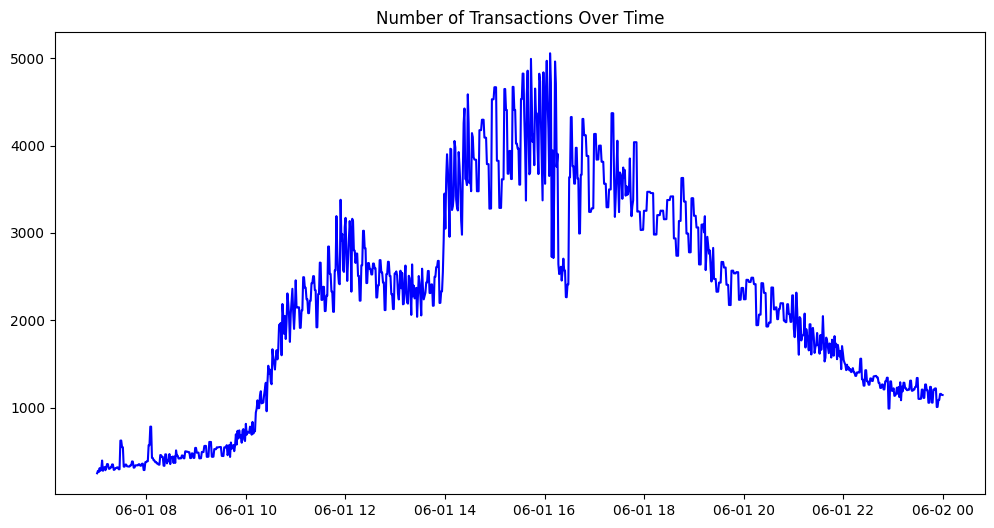

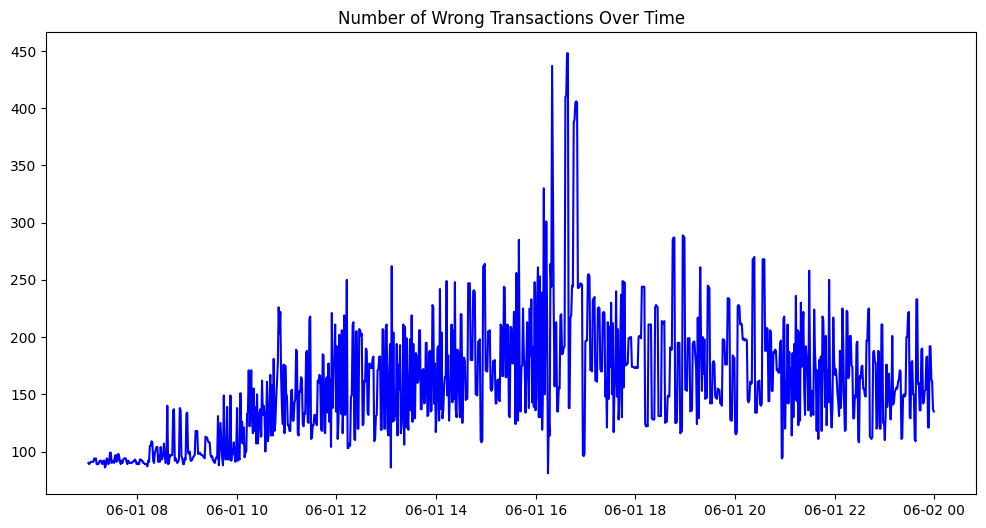

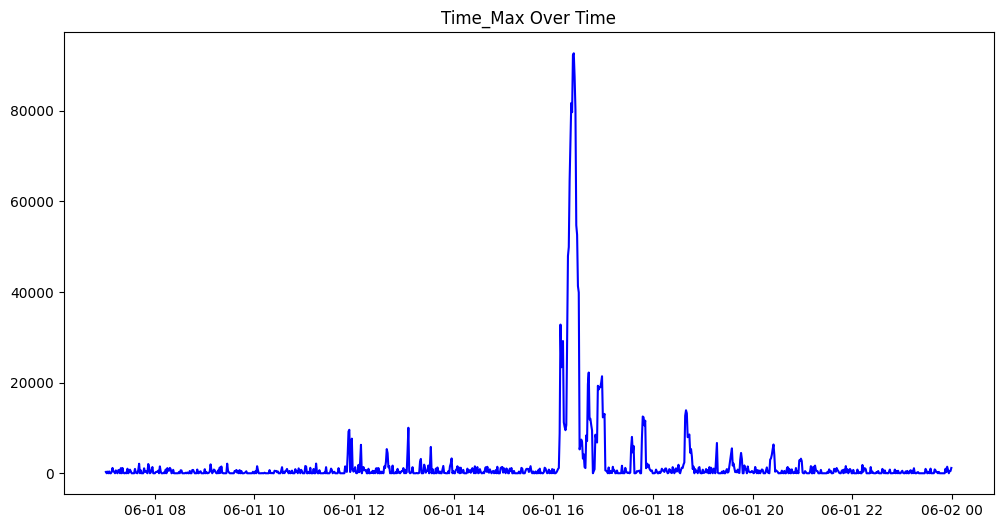

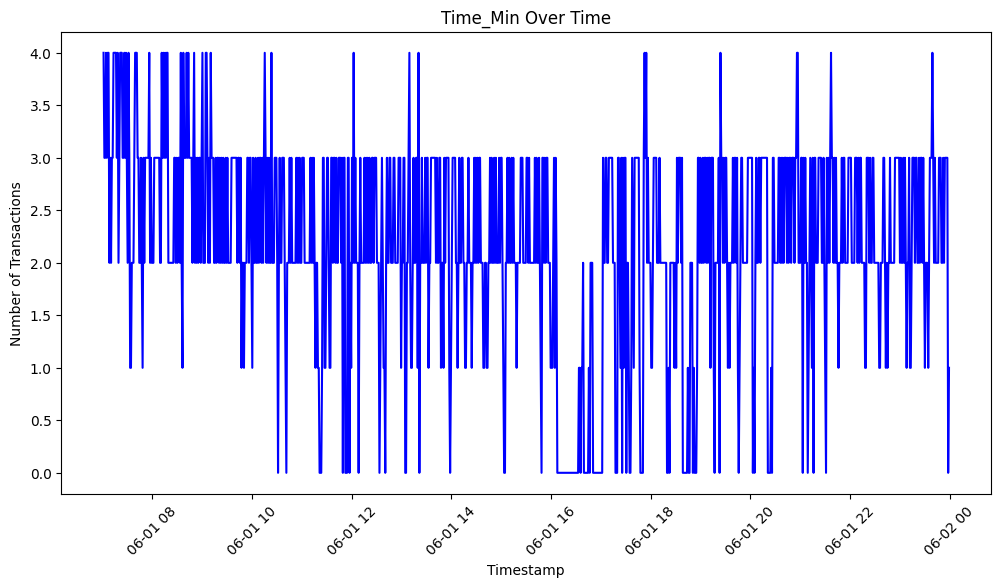

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

# Plot the Num_Transactions from the generated data, x-axis is the index
plt.figure(figsize=(12, 6))
plt.plot(new_data['Timestamp'], new_data["Num_Transactions"], color="b")
plt.title("Number of Transactions Over Time")
plt.figure(figsize=(12, 6))
plt.plot(new_data['Timestamp'], new_data["Num_Wrong_Transactions"], color="b")
plt.title("Number of Wrong Transactions Over Time")
plt.figure(figsize=(12, 6))
plt.plot(new_data['Timestamp'], new_data["Time_Max"], color="b")
plt.title("Time_Max Over Time")
plt.figure(figsize=(12, 6))
plt.plot(new_data['Timestamp'], new_data["Time_Min"], color="b")
plt.title("Time_Min Over Time")
# plt.figure(figsize=(12, 6))
# plt.plot(new_data.index, new_data["Time_Min"], color="b")
plt.xlabel("Timestamp")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
# plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d %H:%M'))
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
# Ensure the Timestamp column is in datetime format
# new_data['Timestamp'] = pd.to_datetime(new_data['Timestamp'])